
# **5.Muestreo de una función y reconstrucción mediante interpolación sinc.**<br>
*** 
- Elaboró:
<br> Santa Fe García, Braulio Leonardo.

<br> Interpolación SINC
<br>Dada una secuencia de números reales, x[n], la función continua:

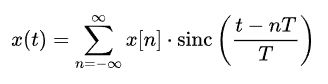

tiene una Transformada de Fourier, X(f), cuyos valores no nulos están limitados a la región: |f| ≤ 1/2T.  cuando el parámetro T tiene unidades de segundos, la banda o linea, 1/2T, tiene unidades de ciclos/segundos (hertz). Cuando la secuencia x[n] representa muestras de tiempo, en el intervalo T, de una función continua, la cantidad fs = 1/T que se conoce como la Frecuencia de muestreo, y fs/2 es la que corresponde con la frecuencia de Harry Nyquist . Cuando la función de muestreo tiene un límite de banda, B, menor que la frecuencia de Nyquist, x(t) es una perfecta reconstrucción de la función original. 

***
## **1.Calculando el muestreo para la función.** <br>


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Periodo de la señal
T=100
#Frecuencia de la señal
F=1/T
#Definiendo x, con N muestras
x=np.linspace(0,T,1000)
#Definiendo la función
y=np.sin(8*np.pi*F*x)


Text(0.5, 1.0, 'Función muestreada')

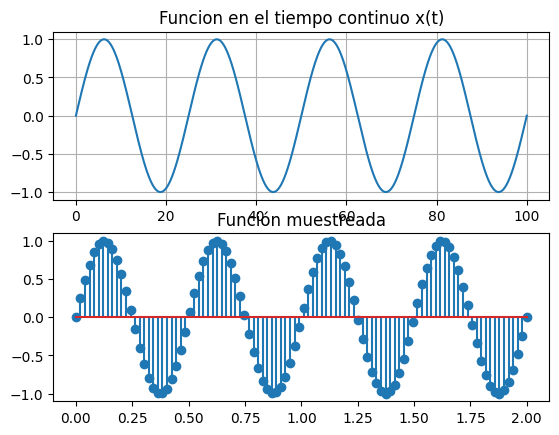

In [4]:
#Dividiendo la gráfica en dos filas y una columna
plt.subplot(2,1,1)
#graficando la señal original
plt.plot(x,y)
plt.show
plt.grid(True)
plt.title('Funcion en el tiempo continuo x(t)')

#grafica de señal en tiempo discreto
plt.subplot(2,1,2)
#Para sacar la frecuencia de muestreo es necesario lo siguiente
# Obtener la frecuencia que hay en la señal
Fsen=(8*np.pi*F)/(2*np.pi)
#Obteniendo la frecuencia de muestreo
fm=2*Fsen
Ts=1/fm

#por lo tanto
fd=Fsen/fm
#periodo inverso a la frecuencia de la señal digital
Td=1/fd




#Definiendo las muestras
n=np.linspace(0,Td,100)
xn=np.sin(8*np.pi*fd*n)
#para graficar de forma discreta
plt.stem(n,xn)
plt.title('Función muestreada')


- _**Figura 01**(Gráfica superior)_:   Función continua.<br>
- _**Figura 02**(Gráfica inferior)_:   Muestreo de la función.<br>


## **1.Generando la reconstrucción de la señal .** <br>
##### _Tomamos en cuenta el muestreo anterior para poder generar la reconstrucción de la señal._
##### _Las función que se ocupará será la siguiente:_<br>
$$\sum_{i=\infty}^{\infty}\left(X_n . g(t-\delta t) \right) ;$$<br>
_Tomando en cuenta..._
$$ t= t-\delta t$$ <br>
$$ g(t)=( \frac{sin(\pi f_n t)}{\pi f_n t})$$ 


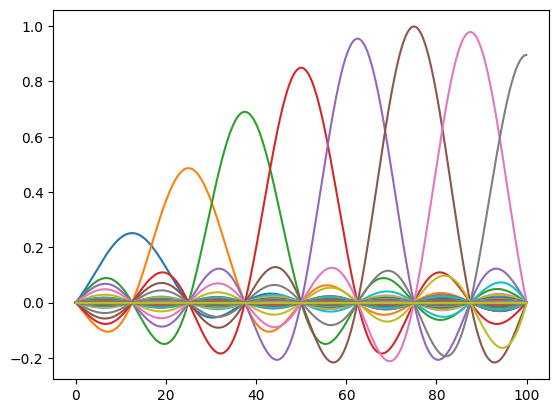

In [5]:
#reconstruccion de la señal mediante el método de la funcion sinc
np.seterr(divide='ignore', invalid='ignore')
for i in range (1,len(xn)):
    xrec=xn[i]*((np.sin(np.pi*fm*(x-i*Ts)))/(np.pi*fm*(x-i*Ts)))   
    plt.plot(x,xrec)

- _Figura 03_: Gráfica de reconstruccción de la señal a partir de la función sinc sin sumar las funciones. 

_Si tomamos en cuenta la siguiente imagen notaremos que nuestros resultados respecto a la función sinc son muy similares respecto a la geometría_<br> 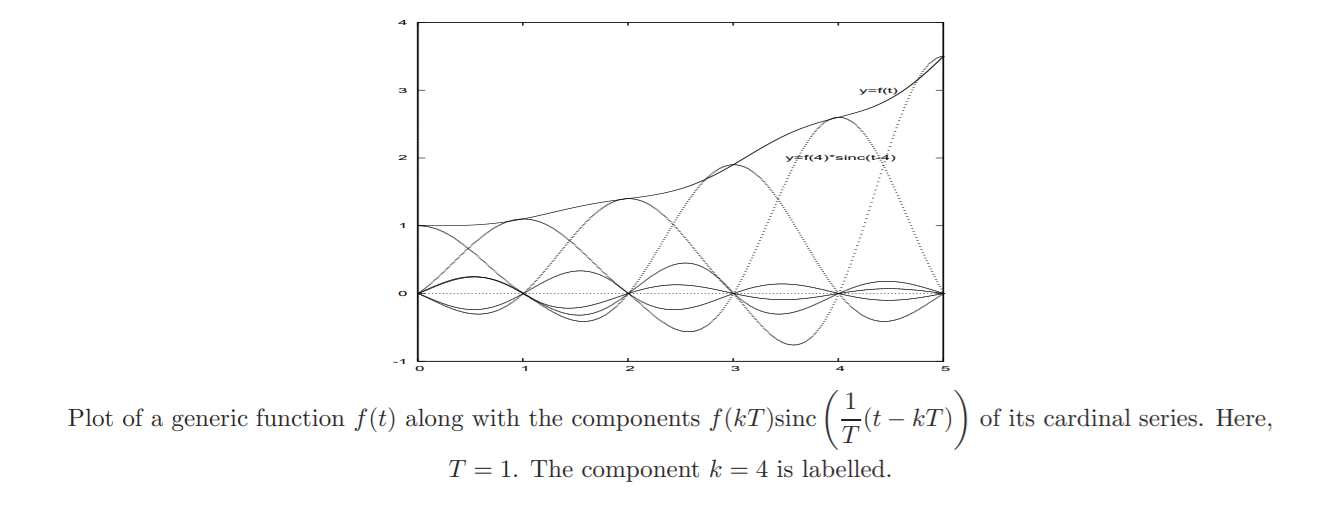 <br> 
- _**Figura 04**_ _Sacado de Lecture 18,The Sampling Theorem,Relevant section from Boggess and Narcowich: 2.7, pp. 117-120._ 
<br><br> Aunque la _**Figura 04**_ está en términos de la función sinc pero en otros términos a comparación de como  obtuvimos en la _**Figura 03**_ la geometría es muy similar. <br><br>
Al sumar todas las funciones, obtenemos la siguiente gráfica que pareciera ser muy parecida a la _**Figura 01**_ (la función continua que queríamos reconstruir) aunque con un poco de discrepancias en la amplitud, además pareciera estar invertida pese a que los 4 ciclos se cumplen. 





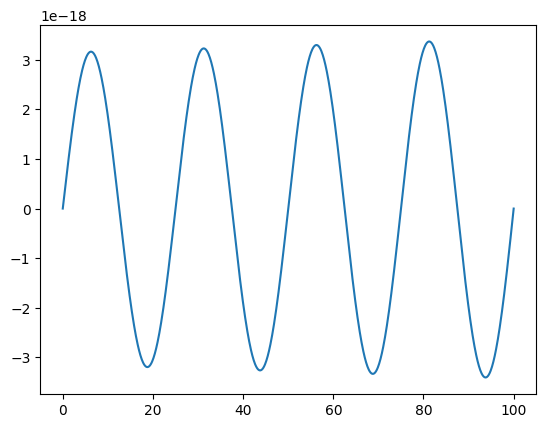

In [6]:
plt.plot(x,-xrec)

_**Figura 05**_: Reconstruccción de la señal a partir de la _función sinc_. 